# Load dataset (Fashion MNIST)

In [83]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
labels={
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot',
}
def load_mnist(path, kind='train'):
    import os
    import struct
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        struct.unpack('>II', lbpath.read(8))
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8)

    with gzip.open(images_path, 'rb') as imgpath:
        struct.unpack(">IIII", imgpath.read(16))
        images = np.frombuffer(imgpath.read(), dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

In [4]:
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')
y_train,y_test = y_train.astype(np.int64),y_test.astype(np.int64)
print('Training set size: {}'.format(X_train.shape))
print('Testing set size: {}'.format(X_test.shape))

Training set size: (60000, 784)
Testing set size: (10000, 784)


In [6]:
from matplotlib import pyplot as plt,cm
def show_img(im,figsize=None,ax=None,cmap=cm.binary):
    if not ax: fig,ax = plt.subplots(figsize = figsize)
    ax.imshow(im,cmap=cmap)
    return ax

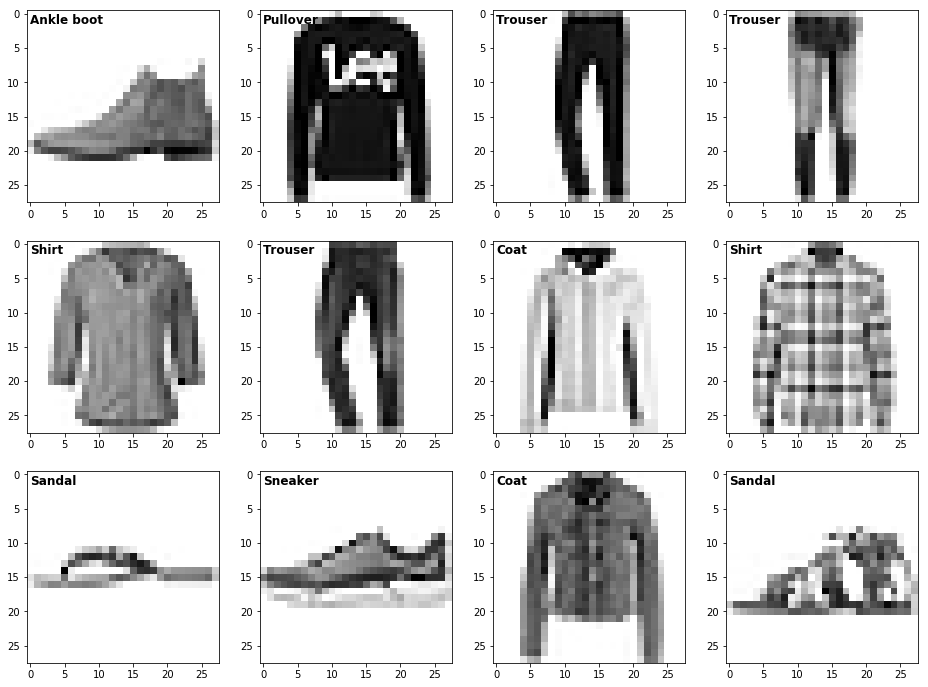

In [6]:
fig,axes=plt.subplots(3, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
    _=show_img(X_test.reshape([-1,28,28])[i],ax=ax)
    _=ax.text(0,0, labels[y_test[i]],
        verticalalignment='top', color='black', fontsize=12, weight='bold')

# Normalize dataset (preprocessing for Neural Net)

In [5]:
n_mean = np.mean(X_train)
n_std = np.std(X_train)
n_mean,n_std

(72.94035223214286, 90.02118235130519)

In [6]:
X_train = np.array((X_train - n_mean)/n_std)
X_test = np.array((X_test - n_mean)/n_std)

In [7]:
X_train.shape

(60000, 784)

In [8]:
np.mean(X_train)

-1.74808013869143e-17

# Applying Neural net model
- Stochastic gradient descent
- 1 hidden layer
- Softmax activation for output layer, ReLU for other layers
- L2 regularization

In [9]:
from model.activation_classes import ReLU,Sigmoid,LeakyReLU
from model.neural_network import CustomNeuralNetwork

In [10]:
act_obj = ReLU()
layers = [X_train.shape[1],100,10]
layers

[784, 100, 10]

In [11]:
nn = CustomNeuralNetwork(layers,act_obj)

## No l2 regularization (l2=0)

Epoch 1. Training loss: 2.9489168672255204, Val loss:3.481525681055469
Epoch 2. Training loss: 2.778400119310902, Val loss:3.0193271392098033
Epoch 3. Training loss: 2.735824302542128, Val loss:3.415448885775425
Epoch 4. Training loss: 2.7446793700773653, Val loss:3.703486990345996
Epoch 5. Training loss: 2.787436298456632, Val loss:3.0745350249012513


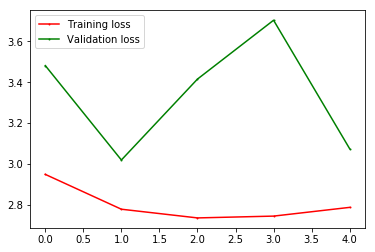

In [12]:
# nn.fit_epoch(X_tr,y_tr,X_t,y_t,lr=0.001,epochs=20,bs=64)
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=5,bs=512)

Epoch 1. Training loss: 1.4894114954796602, Val loss:1.3519398722282958
Epoch 2. Training loss: 1.281734213311027, Val loss:1.2994787992582224
Epoch 3. Training loss: 1.239201191432268, Val loss:1.2572981096916334
Epoch 4. Training loss: 1.2038779068219772, Val loss:1.2219913627194767
Epoch 5. Training loss: 1.1736168295870806, Val loss:1.1917415534410538
Epoch 6. Training loss: 1.1470280628659424, Val loss:1.1652489871116212
Epoch 7. Training loss: 1.1232317786258328, Val loss:1.1416546450538811
Epoch 8. Training loss: 1.1016358061701628, Val loss:1.120314482909563
Epoch 9. Training loss: 1.0819441991867782, Val loss:1.1007903236591028
Epoch 10. Training loss: 1.0639053855083616, Val loss:1.0828658520240737
Epoch 11. Training loss: 1.0473469066088186, Val loss:1.0663333607343501
Epoch 12. Training loss: 1.0321094977145056, Val loss:1.051024651215734
Epoch 13. Training loss: 1.0180891185662926, Val loss:1.036881626784313
Epoch 14. Training loss: 1.0051881170228745, Val loss:1.023764767

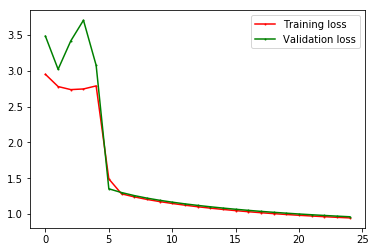

In [13]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=20,bs=512)

Epoch 1. Training loss: 0.9334675971813338, Val loss:0.9524754954929117
Epoch 2. Training loss: 0.9295835525928141, Val loss:0.9485916266070548
Epoch 3. Training loss: 0.9258305180598242, Val loss:0.9448193492333603
Epoch 4. Training loss: 0.922186452143318, Val loss:0.9411584179253605
Epoch 5. Training loss: 0.918646951767511, Val loss:0.9376039496016784
Epoch 6. Training loss: 0.9151954203217774, Val loss:0.9341415370426303
Epoch 7. Training loss: 0.9118352196029976, Val loss:0.9307680485468678
Epoch 8. Training loss: 0.908561847470626, Val loss:0.9274959501548096
Epoch 9. Training loss: 0.9053741022073389, Val loss:0.9243110615148836
Epoch 10. Training loss: 0.9022690125065258, Val loss:0.9212090573032256


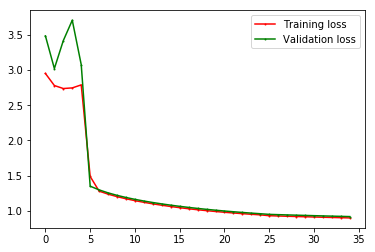

In [14]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.0005,epochs=10,bs=512)

## With l2 regularization

In [15]:
nn = CustomNeuralNetwork(layers,act_obj)

Epoch 1. Training loss: 2.9780203114666928, Val loss:2.787931258955658
Epoch 2. Training loss: 2.687431236972925, Val loss:2.8540038369716987
Epoch 3. Training loss: 2.560881599072292, Val loss:3.2985636168440062
Epoch 4. Training loss: 2.606093091657774, Val loss:3.4800078590474106
Epoch 5. Training loss: 2.731258402726739, Val loss:3.0827637174802205


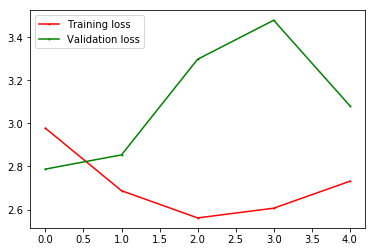

In [16]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=5,bs=512,l2=2)

Epoch 1. Training loss: 1.446899296572655, Val loss:1.2942186437158751
Epoch 2. Training loss: 1.236536029403234, Val loss:1.2478144402501745
Epoch 3. Training loss: 1.1976749497098569, Val loss:1.2091782007600058
Epoch 4. Training loss: 1.1646944681061877, Val loss:1.1765963177796182
Epoch 5. Training loss: 1.13619542677942, Val loss:1.1484870901191335
Epoch 6. Training loss: 1.1111866926152434, Val loss:1.1238761350571072
Epoch 7. Training loss: 1.0889309079896698, Val loss:1.102060216372259
Epoch 8. Training loss: 1.0688898160936358, Val loss:1.0825051777285337
Epoch 9. Training loss: 1.0507488157145826, Val loss:1.0648371685201745
Epoch 10. Training loss: 1.034253129362839, Val loss:1.0486933897566593
Epoch 11. Training loss: 1.0192006128940392, Val loss:1.0338563594981784
Epoch 12. Training loss: 1.0054485298354017, Val loss:1.0202352404142012
Epoch 13. Training loss: 0.9928257008304613, Val loss:1.007665877808683
Epoch 14. Training loss: 0.9812168417609384, Val loss:0.99605702730

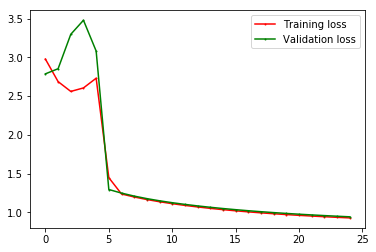

In [17]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=20,bs=512,l2=2)

Epoch 1. Training loss: 0.9176927614012655, Val loss:0.9341645199081038
Epoch 2. Training loss: 0.9142036206521469, Val loss:0.9306616368532865
Epoch 3. Training loss: 0.9108160236608825, Val loss:0.927264878405878
Epoch 4. Training loss: 0.907526185600346, Val loss:0.9239682630814962
Epoch 5. Training loss: 0.9043304788880027, Val loss:0.920764870650086
Epoch 6. Training loss: 0.9012193754979599, Val loss:0.9176499625168404
Epoch 7. Training loss: 0.8981843169598998, Val loss:0.9146107349515827
Epoch 8. Training loss: 0.8952186328034567, Val loss:0.9116460407520868
Epoch 9. Training loss: 0.8923214169961804, Val loss:0.9087484876919172
Epoch 10. Training loss: 0.8894926507326562, Val loss:0.9059196908972497


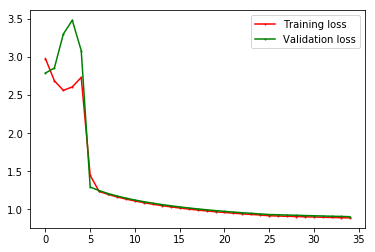

In [18]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.0005,epochs=10,bs=512,l2=2)

Epoch 1. Training loss: 0.5544133806675109, Val loss:0.5712077430535455
Epoch 2. Training loss: 0.553434998435115, Val loss:0.5702774078389155
Epoch 3. Training loss: 0.5524685273165911, Val loss:0.5693608911249713
Epoch 4. Training loss: 0.5515098994758637, Val loss:0.5684558495059607
Epoch 5. Training loss: 0.5505569867955493, Val loss:0.5675614104654799
Epoch 6. Training loss: 0.5496132928647284, Val loss:0.5666823395604489
Epoch 7. Training loss: 0.5486815158369837, Val loss:0.5658165050848328
Epoch 8. Training loss: 0.5477615764310572, Val loss:0.5649645450210325
Epoch 9. Training loss: 0.5468519750531273, Val loss:0.5641245264554262
Epoch 10. Training loss: 0.5459505826158658, Val loss:0.5632945868550074
Epoch 11. Training loss: 0.5450579924348745, Val loss:0.5624774350833859
Epoch 12. Training loss: 0.5441761206472651, Val loss:0.5616753244244416
Epoch 13. Training loss: 0.5433054168550366, Val loss:0.5608854800580001
Epoch 14. Training loss: 0.5424475694077883, Val loss:0.56010

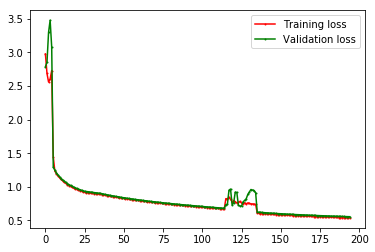

In [35]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=20,bs=512,l2=0.5)

# Evaluate neural net

In [19]:
from model.metrics import accuracy

In [36]:
#accuracy on test set
y_pred=nn.predict(X_test)
accuracy(y_test,y_pred)

0.8021

In [26]:
# Compute confusion matrix for a model
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

Text(0.5,69,'Predicted label')

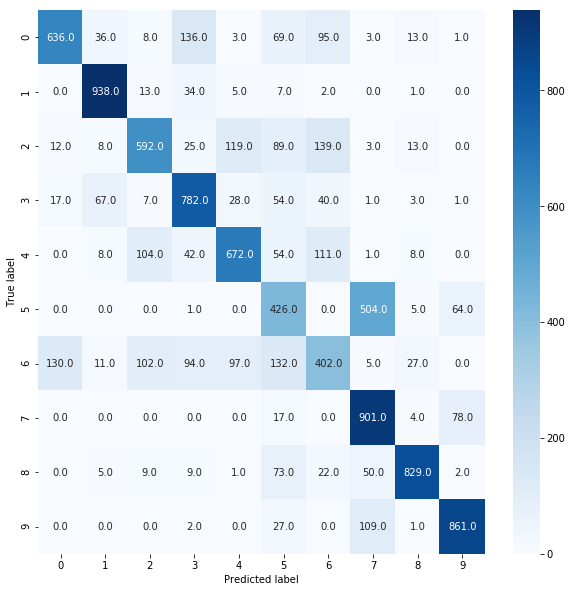

In [37]:
# view with a heatmap
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues',fmt='.1f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Conclusion
With better weight control (l2 reg), it's faster to reach a better log loss score on validation set (for l2 model it only took 14 epochs). Combining with manual fine tuning on learning rate and l2 rate, this model achieves 80% accuracy on test set after ~100 epochs. This is really good comparing to the NN pytorch module I created [here](https://github.com/anhquan0412/basic_model_scratch/blob/master/NN_pytorch.ipynb) which achieves 87% acccuracy using batch normalization, dropout and Adam optimizer. 


# Extra

## Sigmoid activation

In [39]:
from model.activation_classes import ReLU,Sigmoid,LeakyReLU
from model.neural_network import CustomNeuralNetwork

act_obj = Sigmoid()
layers = [X_train.shape[1],100,10]
layers

nn = CustomNeuralNetwork(layers,act_obj)

Epoch 1. Training loss: 2.2080280611034278, Val loss:2.1543758775576087
Epoch 2. Training loss: 2.1366603350199256, Val loss:2.120260127296565
Epoch 3. Training loss: 2.103379021302526, Val loss:2.086966244059582
Epoch 4. Training loss: 2.0679162054279034, Val loss:2.0498025033491514
Epoch 5. Training loss: 2.0276377152480083, Val loss:2.007602982947323


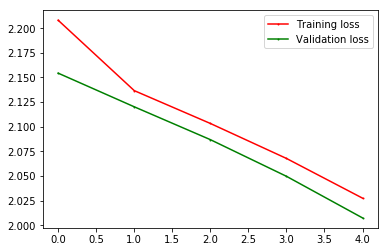

In [40]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=5,bs=512,l2=2)

Epoch 1. Training loss: 2.003117304348543, Val loss:2.0030249794243775
Epoch 2. Training loss: 1.9984573984987237, Val loss:1.998485474846472
Epoch 3. Training loss: 1.993815465396123, Val loss:1.9939271464587172
Epoch 4. Training loss: 1.9891542058319767, Val loss:1.9893382137226545
Epoch 5. Training loss: 1.984464748042872, Val loss:1.9847180045672224
Epoch 6. Training loss: 1.979746165387934, Val loss:1.9800685742749167
Epoch 7. Training loss: 1.9749999905817985, Val loss:1.9753926587387007
Epoch 8. Training loss: 1.9702286305781531, Val loss:1.970693175965653
Epoch 9. Training loss: 1.9654348550069232, Val loss:1.9659731030003367
Epoch 10. Training loss: 1.960621604063303, Val loss:1.9612354402522776
Epoch 11. Training loss: 1.9557919013995055, Val loss:1.9564831937223615
Epoch 12. Training loss: 1.9509488056773936, Val loss:1.9517193594981443
Epoch 13. Training loss: 1.9460953781257468, Val loss:1.9469469078165231
Epoch 14. Training loss: 1.9412346575676716, Val loss:1.94216876680

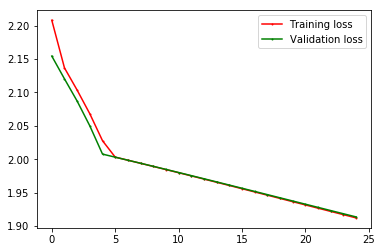

In [41]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=20,bs=512,l2=2)

With sigmoid, model is slower to learn. This can be the result of vanishing gradient problem as sigmoid's gradient is easier to approach 0 when inputs are at two extreme ends.

## Leaky ReLU activation?

In [42]:
from model.activation_classes import ReLU,Sigmoid,LeakyReLU
from model.neural_network import CustomNeuralNetwork

act_obj = LeakyReLU(0.05)
layers = [X_train.shape[1],100,10]
layers

nn = CustomNeuralNetwork(layers,act_obj)

Epoch 1. Training loss: 2.921338549645247, Val loss:3.4529590348511214
Epoch 2. Training loss: 2.6549256499904943, Val loss:3.2603796853299407
Epoch 3. Training loss: 2.496237777880593, Val loss:2.232691455894487
Epoch 4. Training loss: 2.45877886191602, Val loss:2.661779240678697
Epoch 5. Training loss: 2.620471662724355, Val loss:3.5077911207212913


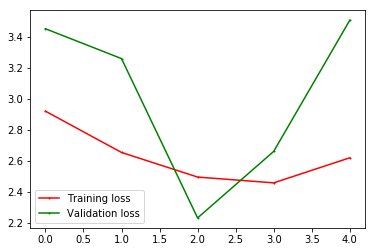

In [43]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=5,bs=512,l2=2)

Epoch 1. Training loss: 1.2728211261150384, Val loss:1.1989651636790917
Epoch 2. Training loss: 1.1520540313886238, Val loss:1.1625239528659486
Epoch 3. Training loss: 1.1206195386760325, Val loss:1.1315211895251924
Epoch 4. Training loss: 1.0934748887843015, Val loss:1.1046589969966345
Epoch 5. Training loss: 1.0697044443492183, Val loss:1.0813958652763416
Epoch 6. Training loss: 1.0486493636566676, Val loss:1.0608489680047377
Epoch 7. Training loss: 1.0298253371787174, Val loss:1.0425033373596988
Epoch 8. Training loss: 1.0128761670451545, Val loss:1.0258936955705575
Epoch 9. Training loss: 0.997533508340215, Val loss:1.0108430898764817
Epoch 10. Training loss: 0.9835569934983687, Val loss:0.997122950332575
Epoch 11. Training loss: 0.97079036083197, Val loss:0.9845627792040392
Epoch 12. Training loss: 0.959067298728542, Val loss:0.9730044462335334
Epoch 13. Training loss: 0.9482889341710908, Val loss:0.9623188237329616
Epoch 14. Training loss: 0.9383461136836779, Val loss:0.952408818

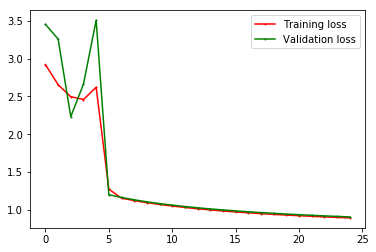

In [44]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=20,bs=512,l2=2)

Epoch 1. Training loss: 0.8028878164469017, Val loss:0.8119325340731106
Epoch 2. Training loss: 0.7998732976827784, Val loss:0.8088374919784199
Epoch 3. Training loss: 0.7969209026074948, Val loss:0.8058093478711373
Epoch 4. Training loss: 0.7940232075767341, Val loss:0.8028464808304613
Epoch 5. Training loss: 0.7911788205391577, Val loss:0.7999402086659514
Epoch 6. Training loss: 0.7883880468437351, Val loss:0.7970855661744004
Epoch 7. Training loss: 0.7856493328929232, Val loss:0.7942841337753052
Epoch 8. Training loss: 0.7829570948525305, Val loss:0.7915344744600681
Epoch 9. Training loss: 0.7803072122993707, Val loss:0.7888285801223326
Epoch 10. Training loss: 0.7777001696342289, Val loss:0.7861732969053807
Epoch 11. Training loss: 0.7751335883950871, Val loss:0.7835648593058915
Epoch 12. Training loss: 0.772611754714162, Val loss:0.7809966594621491
Epoch 13. Training loss: 0.7701276240491516, Val loss:0.7784689803576147
Epoch 14. Training loss: 0.7676835585478253, Val loss:0.77598

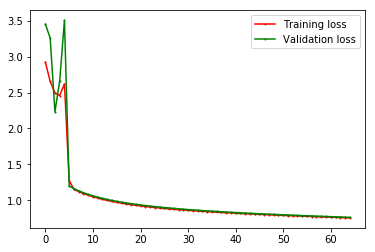

In [46]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=20,bs=512,l2=0)

# Deeper Neural Net

In [56]:
act_obj = ReLU()
layers = [X_train.shape[1],30,20,10]
print(layers)

nn = CustomNeuralNetwork(layers,act_obj)

[784, 30, 20, 10]


Epoch 1. Training loss: 2.251399851493328, Val loss:2.2340087568512934
Epoch 2. Training loss: 2.147548126351278, Val loss:2.217590118543584
Epoch 3. Training loss: 2.1328230945941193, Val loss:2.2018447789128412
Epoch 4. Training loss: 2.1183249943472937, Val loss:2.185816867972672
Epoch 5. Training loss: 2.103438577729974, Val loss:2.1690841611273863
Epoch 6. Training loss: 2.087790116079619, Val loss:2.1513077780497913
Epoch 7. Training loss: 2.0710489602567694, Val loss:2.1321530181733657
Epoch 8. Training loss: 2.052927246074189, Val loss:2.111372617260571
Epoch 9. Training loss: 2.033193428937091, Val loss:2.0886849694791527
Epoch 10. Training loss: 2.011641957737308, Val loss:2.06390554195209


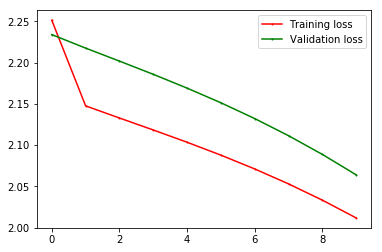

In [57]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=10,bs=512,l2=2)

Epoch 1. Training loss: 1.9881143346130141, Val loss:2.03749563414158
Epoch 2. Training loss: 1.9626640944920912, Val loss:2.00904764277402
Epoch 3. Training loss: 1.9356803756975496, Val loss:1.9793672776165192
Epoch 4. Training loss: 1.9076906023335714, Val loss:1.9496200708654077
Epoch 5. Training loss: 1.8791550700339765, Val loss:1.9195659380981502
Epoch 6. Training loss: 1.8504359931732195, Val loss:1.8893672421780665
Epoch 7. Training loss: 1.8220153696755894, Val loss:1.859707993890968
Epoch 8. Training loss: 1.7943563825072504, Val loss:1.8309699760427727
Epoch 9. Training loss: 1.76772996198545, Val loss:1.8032818068891483
Epoch 10. Training loss: 1.7422793382988178, Val loss:1.7766438653386358
Epoch 11. Training loss: 1.7179623593243187, Val loss:1.7509449119168985
Epoch 12. Training loss: 1.6947022998951526, Val loss:1.7259976291137005
Epoch 13. Training loss: 1.67234393290893, Val loss:1.7016402703868487
Epoch 14. Training loss: 1.6507677713808402, Val loss:1.6778417560450

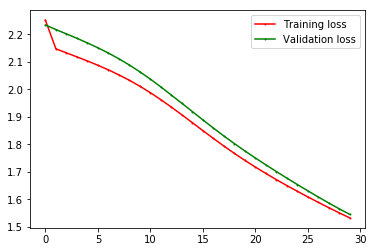

In [58]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=20,bs=512,l2=0)

Epoch 1. Training loss: 1.3097806084877954, Val loss:1.3291423040506751
Epoch 2. Training loss: 1.3023353101308597, Val loss:1.388434451500173
Epoch 3. Training loss: 1.2952853606324042, Val loss:1.3787619869211034
Epoch 4. Training loss: 1.284319419502578, Val loss:1.3119930882260993
Epoch 5. Training loss: 1.2760227007072154, Val loss:1.308110890061248
Epoch 6. Training loss: 1.2713430875181182, Val loss:1.2972796858589568
Epoch 7. Training loss: 1.258513988011788, Val loss:1.286891446536391
Epoch 8. Training loss: 1.261942550865047, Val loss:1.3149182906880768
Epoch 9. Training loss: 1.2528386308585762, Val loss:1.2792056243931689
Epoch 10. Training loss: 1.2550406141664268, Val loss:1.3111686767129291
Epoch 11. Training loss: 1.2491439091543683, Val loss:1.280495698054411
Epoch 12. Training loss: 1.235385449546147, Val loss:1.2622582621445406
Epoch 13. Training loss: 1.2417737529380717, Val loss:1.2679078438689884
Epoch 14. Training loss: 1.2355673889524585, Val loss:1.249962179866

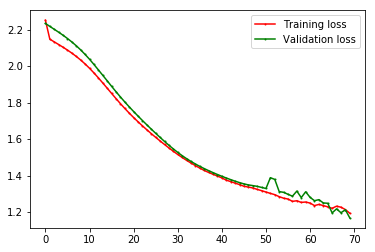

In [60]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=20,bs=512,l2=0)

Epoch 1. Training loss: 1.0161779510497149, Val loss:1.0237698680091396
Epoch 2. Training loss: 1.0122533928611814, Val loss:1.0200964960662577
Epoch 3. Training loss: 1.008381905114873, Val loss:1.0164696964389384
Epoch 4. Training loss: 1.00456505665191, Val loss:1.0128939292211399
Epoch 5. Training loss: 1.0008000725794601, Val loss:1.0093681765669145
Epoch 6. Training loss: 0.9970813403986711, Val loss:1.005887968303579
Epoch 7. Training loss: 0.9934053062189838, Val loss:1.002452294126439
Epoch 8. Training loss: 0.9897757371602686, Val loss:0.9990629517864134
Epoch 9. Training loss: 0.9861928108765421, Val loss:0.9957177595077297
Epoch 10. Training loss: 0.9826591440269312, Val loss:0.9924207323365106
Epoch 11. Training loss: 0.9791695939594519, Val loss:0.9891657342316925
Epoch 12. Training loss: 0.975721017854, Val loss:0.9859535708865004
Epoch 13. Training loss: 0.9723160954835921, Val loss:0.9827831943200809
Epoch 14. Training loss: 0.968958719963524, Val loss:0.97964966997729

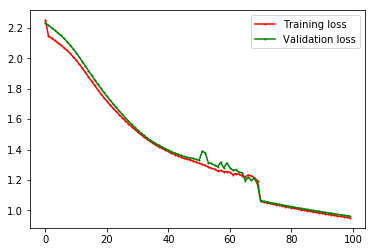

In [62]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.0005,epochs=20,bs=512,l2=0)

# Deeper and bigger NN -> Error

In [97]:
act_obj = ReLU()
layers = [X_train.shape[1],30,20,10]
print(layers)

nn = CustomNeuralNetwork(layers,act_obj)

[784, 30, 20, 10]


C:\Users\qtran\basic_model_scratch\model\neural_network.py:66: RuntimeWarning: invalid value encountered in multiply
  grad_wrt_input = grad_wrt_input * self.act_obj.grad(self.X_inputs[i+1]) # this is grad_wrt_input
C:\Users\qtran\basic_model_scratch\model\activation_classes.py:20: RuntimeWarning: invalid value encountered in greater_equal
  return np.where(x >= 0, x, 0)
C:\Users\qtran\basic_model_scratch\model\activation_classes.py:23: RuntimeWarning: invalid value encountered in greater_equal
  return np.where(x >= 0, 1, 0)
C:\Users\qtran\basic_model_scratch\model\neural_network.py:71: RuntimeWarning: invalid value encountered in multiply
  grad_w+= (l2/bs) * self.weights[i][0] # l2 reg


Epoch 1. Training loss: 2.5821335255667925, Val loss:2.302748280583065
Epoch 2. Training loss: 2.302728499745794, Val loss:2.3026030404925035
Epoch 3. Training loss: 2.3026754322919833, Val loss:2.302602187643029


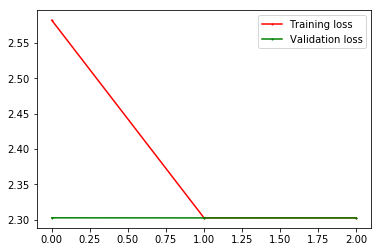

In [98]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.1,epochs=3,bs=512,l2=0)

There is a problem with the code: X_input will grow really fast (exponentially?) even though weights are still between 0 and 1 (probably due to large hidden layers, i.e >1000 or **multiple hidden layers**, i.e 2 hidden layers 50->20 and matrix multiplication is essentially adding up as many numbers as the weights' shape) which makes grad_wrt_input grows fast (grad_wrt_input needs grad_relu(X_input) which will return X_input itself if it's >=0) -> grad_w grow fast -> weight update fast -> X_input grow fast ...

Solution: weight clipping / pick another activation function?